# Cleaning string data
Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.
For strings this process starts by applying a list of common functions (lower, strip).  Then handling missing and duplicate entries. And finally applying custom functions as needed.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import pandas as pd
import numpy as np

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

# Set max rows and columns displayed in jupyter
# pd.set_option("display.max_rows", 100)
# pd.set_option("display.max_columns", 20)

## Load a dataset

In [3]:
FILE_RAW = '../projects/proj1/data/Ask A Manager Salary Survey 2021 (Responses) - Form Responses 1.csv'
FILE_FEATHER = '../projects/proj1/data/AskAManagerSalarySurvey2021-Form Responses1.feather'

In [4]:
df=pd.read_csv(FILE_RAW)
df.head()
print(df.shape)

,Timestamp,How old are you?,Industry,Job title,Additional context on job title,Annual salary,Other monetary comp,Currency,Currency - other,Additional context on income,Country,State,City,Overall years of professional experience,Years of experience in field,Highest level of education completed,Gender,Race
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


(27609, 18)


In [5]:
# what type is country?  if object then it's a string
df.dtypes

Timestamp                                    object
How old are you?                             object
Industry                                     object
Job title                                    object
Additional context on job title              object
Annual salary                                object
Other monetary comp                         float64
Currency                                     object
Currency - other                             object
Additional context on income                 object
Country                                      object
State                                        object
City                                         object
Overall years of professional experience     object
Years of experience in field                 object
Highest level of education completed         object
Gender                                       object
Race                                         object
dtype: object

In [6]:
x=df['Country'].unique()
x.sort()
x

array([' New Zealand', ' U.S.', ' US', ' United States',
       '$2,175.84/year is deducted for benefits',
       'ARGENTINA BUT MY ORG IS IN THAILAND', 'Afghanistan', 'Africa',
       'America', 'Aotearoa New Zealand', 'Argentina', 'Australi',
       'Australia', 'Australia ', 'Australian ', 'Austria',
       'Austria, but I work remotely for a Dutch/British company',
       'Bangladesh', 'Bangladesh ', 'Belgium', 'Belgium ', 'Bermuda',
       'Brasil', 'Brazil', 'Brazil ', 'Britain ', 'Bulgaria', 'CANADA',
       'CANADA ', 'California ', 'Cambodia', 'Can', 'Canad', 'Canada',
       'Canada ', 'Canada and USA', 'Canada, Ottawa, ontario', 'Canadw',
       'Canadá', 'Canda', 'Catalonia', 'Cayman Islands', 'Chile', 'China',
       'Colombia', 'Company in Germany. I work from Pakistan.', 'Congo',
       'Contracts', 'Costa Rica', "Cote d'Ivoire", 'Croatia ', 'Csnada',
       'Cuba', 'Currently finance', 'Cyprus', 'Czech Republic',
       'Czech Republic ', 'Czech republic', 'Czechia', 'D

## Lets handle missing Country data first to ensure below algorithms run correctly.  
Lots of ways to do this, I'm going to do it the simple way, replace NaN with UNKNOWN

This is not a good idea in general, especially if you have a way to figure out the country from the other data present

In [7]:
#how many missing Countries
df.Country.isnull().sum()

0

In [8]:
# None missing, if there were you could fill with a Sentinal value for now, 
# like UNKNOWN, makes it easy to find and deal with later, also ensures that
# calculations do not fail because of NaNs
df.Country = df.Country.fillna('UNKNOWN')

In [9]:
(df.Country=='UNKNOWN').sum()

0

## There is a Country column, lets use it to get all the USA entries.  Take a look at the number of unique entries

In [10]:
#a small functions to see the number of unique country names
def p_unique(df=df,col='Country'):
    print(f'There are now {df[col].nunique()} unique {col} entries')
p_unique()

There are now 364 unique Country entries


In [11]:
#how many different countries are there
start_with_this_many__unique_countries = df.Country.nunique()
p_unique()

There are now 364 unique Country entries


## How many occurrences for each unique entry?

In [12]:
#lets see what we have
vc=df.Country.value_counts()
print(f'There are {len(vc)} unique entries')
vc[-150:]
# vc[:100]
# vc[50:100]

There are 364 unique entries


Country
ARGENTINA BUT MY ORG IS IN THAILAND                                       1
United states of america                                                  1
UsA                                                                       1
I work for a UAE-based organization, though I am personally in the US.    1
United  States                                                            1
                                                                         ..
Can                                                                       1
Sri Lanka                                                                 1
Worldwide (based in US but short term trips aroudn the world)             1
Danmark                                                                   1
U.S.A                                                                     1
Name: count, Length: 150, dtype: int64

## It looks like there was no filtering on what a user could enter in the Country field, ANyway lets get to it

## Apply lower and strip to get the easy gains

In [13]:
df.Country.unique()

array(['United States', 'United Kingdom', 'US', 'USA', 'Canada',
       'United Kingdom ', 'usa', 'UK', 'Scotland ', 'U.S.',
       'United States ', 'The Netherlands', 'Australia ', 'Spain', 'us',
       'Usa', 'England', 'finland', 'United States of America', 'France',
       'United states', 'Scotland', 'USA ', 'United states ', 'Germany',
       'UK ', 'united states', 'Ireland', 'India', 'Australia', 'Uk',
       'United States of America ', 'U.S. ', 'canada', 'Canada ', 'U.S>',
       'ISA', 'Argentina', 'Great Britain ', 'US ', 'United State',
       'U.S.A', 'Denmark', 'U.S.A.', 'America', 'Netherlands',
       'netherlands', 'England ', 'united states of america', 'Ireland ',
       'Switzerland', 'Netherlands ', 'Bermuda', 'Us',
       'The United States', 'United State of America', 'Germany ',
       'Malaysia', 'Mexico ', 'United Stated', 'South Africa ', 'Belgium',
       'Northern Ireland', 'u.s.', 'South Africa', 'UNITED STATES',
       'united States', 'Sweden', 'Hong K

In [14]:
df.Country = df.Country.map(str.lower).map(str.strip)

p_unique()

There are now 250 unique Country entries


## If have punctuation, get rid of it all
Use regular expressions

In [15]:
import re

In [16]:
#the regular expressions package
import re
punc = "[!\"#$%&\'()*+,-./:;<=>?@[\\]^_{|}~\`]"  #this is the punctuation to get rid of

#or a function
def fun1(x):
    #re.sub will remove any punction char found in punc 
    return re.sub(punc, '', x)

df.Country = df.Country.map(fun1)

#can do the same thing with a lambda
# df.Country = df.Country.map(lambda x: re.sub(punc, '', x))

p_unique()

There are now 236 unique Country entries


In [17]:
#lets see all unique country names that occur at leat n times
ds=df.Country.value_counts()
ds
#filter 1 offs
ds[ds>10]

Country
united states        9842
usa                  9014
us                   3349
canada               1656
uk                    695
                     ... 
uk for us company       1
canad                   1
cambodia                1
eritrea                 1
canadá                  1
Name: count, Length: 236, dtype: int64

Country
united states               9842
usa                         9014
us                          3349
canada                      1656
uk                           695
united kingdom               626
united states of america     481
australia                    382
germany                      190
england                      168
ireland                      124
new zealand                  121
france                        66
netherlands                   54
scotland                      45
spain                         44
sweden                        41
switzerland                   38
belgium                       34
the netherlands               31
japan                         29
denmark                       22
america                       21
united state                  19
south africa                  17
unites states                 17
austria                       16
finland                       16
india                         14
singapore                     14
no

In [18]:
#sort by index if you want 
ds1=ds.sort_index()
ds1[:50]  #if you do them all then the really long index entry will knacker the output

#turn index into column, turns series into dataframe
# can access Country now like any other column
# df1=ds.reset_index()
# df1.sort_values(by=['index'])

Country
217584year is deducted for benefits                           1
afghanistan                                                   1
africa                                                        1
america                                                      21
aotearoa new zealand                                          1
argentina                                                     5
argentina but my org is in thailand                           1
australi                                                      1
australia                                                   382
australian                                                    1
austria                                                      16
austria but i work remotely for a dutchbritish company        1
bangladesh                                                    2
belgium                                                      34
bermuda                                                       2
bonus based on meeting yearly go

## Looks like a lot of variations of 'united state'

Another easy gain, lets replace all strings with 'united state' in them with 'usa' 

In [19]:
def fun(x):
    """
    replaces any string that contains 'united state' with 'usa'
    BUT 'united state' and 'usa' are hardcoded, what if we wanted to use other values?
    """
    if 'united state' in x:
        return 'usa'
    return x

#dont do this yet there is a better more general way below
# df.Country = df.Country.map(fun);

## But you might want to do something similar with other strings, do you write another function?  Or do something a little more general?
Be general, always, use a python closure.

## Closures
The problem we face is that map takes a function that takes 1 parameter, and we want it to take 3; The string value passed by map (call it x), the string to search for in x (call it str_to_find), and the string to replace x with if we find str_to_find in x (call it str_replacement).

We can't get around the fact that map only passes 1 parameter to the function.  But we can create a function that  already knows what str_to_find and str_replacement are.  Its called a closure

In [20]:
def fun1(str_to_find, str_replacement):
    """
    creates findandreplace Closure, which is a stateful function
    that remembers str_to_find and str_replacement values
    returns: findandreplace
    """
    def findandreplace(x):
        if str_to_find in x:
            return str_replacement
        return x
    # in python functions are first class objects
    # we are returning findandreplace, it in turn knows the value of 
    # str_to_find and str_replacement and takes an argument to search thru,x
    return findandreplace

#using the closure
fn= fun1('us', 'usa')   #Uh Ohh, what about Australia? Or Austria or Belarus or Cyprus or Russia
                        #careful with this sort of thing!
# df.Country = df.Country.map(fn)

In [21]:
#using the closure one at a time

# fn= fun1('usa', 'usa')
# df.Country = df.Country.map(fn)

# fn= fun1('us', 'usa')
# df.Country = df.Country.map(fn)

# fn= fun1('u s', 'usa')
# df.Country = df.Country.map(fn)

# fn= fun1('unites states', 'usa')  #its a bit suspicious that 17 people made this mistake
# df.Country = df.Country.map(fn)

# fn= fun1('united sates', 'usa')['usa',  'u s', 'unites 
# df.Country = df.Country.map(fn)

# fn= fun1('unitedstates', 'usa')
# df.Country = df.Country.map(fn)

# fn= fun1('united stares', 'usa')
# df.Country = df.Country.map(fn)
#and so on

In [22]:
p_unique()

There are now 236 unique Country entries


In [23]:
#OR you can simplify the above with a list of str_to_find
#and just iterate over it
vals=['usa',  'u s', 'unites states', 'united sates', 'unitedstates', 'united stares', 'united stat', 'america']
for val in vals:
    fn= fun1(val, 'usa')
    df.Country = df.Country.map(fn)
p_unique()

There are now 199 unique Country entries


## Once you get down to the bottom of the unique values you will probably get a lot of one offs
For instance lets see what the the values are

start here 1/22/24

In [25]:
# vals=df.Country.unique()
# vals.sort()
# vals
df.Country.value_counts()[-50:]

Country
mainland china                                                                                                                                                                         1
csnada                                                                                                                                                                                 1
japan us gov position                                                                                                                                                                  1
hartford                                                                                                                                                                               1
new zealand aotearoa                                                                                                                                                                   1
uniteed states                                                     

usa## Notice there are a lot of united states ish entries at the bottom, lets see if fuzzy wuzzy helps

In [91]:
# this package lives in the conda forge
# !conda install -c conda-forge fuzzywuzzy -y

In [27]:
# helpful modules
import fuzzywuzzy
from fuzzywuzzy import process

In [28]:
#looking for strings similar to 'unit', for return list
# first is the match, second is the score, third is the index in the dataframe
matches = fuzzywuzzy.process.extract("unit", df.Country, limit=150)
matches

[('united kingdom', 90, 1),
 ('united kingdom', 90, 15),
 ('united kingdom', 90, 59),
 ('united kingdom', 90, 93),
 ('united kingdom', 90, 114),
 ('united kingdom', 90, 126),
 ('united kingdom', 90, 147),
 ('united kingdom', 90, 177),
 ('united kingdom', 90, 207),
 ('united kingdom', 90, 295),
 ('united kingdom', 90, 301),
 ('united kingdom', 90, 339),
 ('united kingdom', 90, 493),
 ('united kingdom', 90, 518),
 ('united kingdom', 90, 641),
 ('united kingdom', 90, 648),
 ('united kingdom', 90, 664),
 ('united kingdom', 90, 682),
 ('united kingdom', 90, 699),
 ('united kingdom', 90, 785),
 ('united kingdom', 90, 877),
 ('united kingdom', 90, 953),
 ('united kingdom', 90, 957),
 ('united kingdom', 90, 1005),
 ('united kingdom', 90, 1016),
 ('united kingdom', 90, 1144),
 ('united kingdom', 90, 1148),
 ('united kingdom', 90, 1149),
 ('united kingdom', 90, 1199),
 ('united kingdom', 90, 1232),
 ('united kingdom', 90, 1257),
 ('united kingdom', 90, 1284),
 ('united kingdom', 90, 1360),
 ('un

In [29]:
#get the first match to prove that the index is the index in the dataframe
df.iloc[ matches[0][2]].Country

'united kingdom'

In [30]:
#they look pretty good, except for the united kingdom
#lets get all the unique matches in matches
#first all matches
l=[]
for mtch in matches:
    l.append(mtch[0])

# get unique values
l = set(l)
print(l)

{'united kingdom england', 'united arab emirates', 'uniteed states', 'united kingdom', 'united kindom'}


In [31]:
#eyeball to get a list of bogus values
dont_sub_these=['united kingdom england', 'united arab emirates',  'united kingdom', 'united kindom']

#remove from l
for v in dont_sub_these:
    try:
        l.remove(v)
    except KeyError as e:
        pass
print(l)


{'uniteed states'}


In [32]:

#now call the above closure
for v in l:
    fn= fun1(v, 'usa')
    df.Country = df.Country.map(fn)

p_unique()

There are now 198 unique Country entries


## Add a new column to track the changed columns
<mark> HOMEWORK: A better way would be to rename 'Country' to 'Country_original' and add a new column 'Country_computed' so we lose no data. <br>
    For this you need access to 2 columns in the dataframe, so map will not work, you should use apply

In [33]:
df.head()

,Timestamp,How old are you?,Industry,Job title,Additional context on job title,Annual salary,Other monetary comp,Currency,Currency - other,Additional context on income,Country,State,City,Overall years of professional experience,Years of experience in field,Highest level of education completed,Gender,Race
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,usa,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,united kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,us,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,usa,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,us,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


In [34]:
%%time
# will receive a row of data and return a single value
def fun2(row):
    #have whole row to operate on
    if row.Country == 'usa':
        return True
    return False


#record whether usa has been found yet or not
df['found_in_db'] = df.apply(fun2, axis=1)

CPU times: user 176 ms, sys: 8.7 ms, total: 185 ms
Wall time: 184 ms


In [35]:
%%time
#do it all with map, much faster
df['found_in_db1'] = df.Country.map(lambda x: True if x=='usa' else False)

CPU times: user 11.9 ms, sys: 0 ns, total: 11.9 ms
Wall time: 11.5 ms


In [36]:
#verify the same results
print((df.found_in_db1 == True).sum())
print((df.found_in_db1 == False).sum())

print((df.found_in_db == True).sum())
print((df.found_in_db == False).sum())

19467
8142
19467
8142


# Lets see if we can do this for other countries.  It will be easier if we have a package that has a list of countries.

<a href="https://pypi.org/project/pycountry/">pycountry</a> is perfect.  It has a list of countries and a fuzzy lookup API. 


In [29]:
# !conda install -c conda-forge pycountry -y

Retrieving notices: ...working... done
done
Solving environment: | 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/noarch::importlib_metadata==6.0.0=hd3eb1b0_0
  - conda-forge/noarch::jupyterlab==4.0.8=pyhd8ed1ab_0
done


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 23.11.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.11.0



## Package Plan ##

  environment location: /home/keith/anaconda3/envs/p311

  added / updated specs:
    - pycountry


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    importlib-metadata-6.0.0   |     pyha770c72_0          24 KB  conda-forge
    jupyter-lsp-2.2.2          |     pyhd8ed1ab_0  

In [37]:
import pycountry

### Demonstrate Pycountry: The following pycountry call will return a tupple if the country found, otherwise it will throw a LookupError

In [40]:
pycountry.countries.lookup('de')
pycountry.countries.lookup('germany')
pycountry.countries.lookup('usa').alpha_3
pycountry.countries.lookup('United States of America')
# pycountry.countries.lookup('united sates') #fails

Country(alpha_2='DE', alpha_3='DEU', flag='🇩🇪', name='Germany', numeric='276', official_name='Federal Republic of Germany')

Country(alpha_2='DE', alpha_3='DEU', flag='🇩🇪', name='Germany', numeric='276', official_name='Federal Republic of Germany')

'USA'

Country(alpha_2='US', alpha_3='USA', flag='🇺🇸', name='United States', numeric='840', official_name='United States of America')

In [47]:
# fuzzywuzzy.process.extract("unitee", df.Country, limit=150)

[('unite states', 78, 10447),
 ('unite states', 78, 13362),
 ('united kingdom', 75, 1),
 ('united kingdom', 75, 15),
 ('united kingdom', 75, 59),
 ('united kingdom', 75, 93),
 ('united kingdom', 75, 114),
 ('united kingdom', 75, 126),
 ('united kingdom', 75, 147),
 ('united kingdom', 75, 177),
 ('united kingdom', 75, 207),
 ('united kingdom', 75, 295),
 ('united kingdom', 75, 301),
 ('united kingdom', 75, 339),
 ('united kingdom', 75, 493),
 ('united kingdom', 75, 518),
 ('united kingdom', 75, 641),
 ('united kingdom', 75, 648),
 ('united kingdom', 75, 664),
 ('united kingdom', 75, 682),
 ('united kingdom', 75, 699),
 ('united kingdom', 75, 785),
 ('united kingdom', 75, 877),
 ('united kingdom', 75, 953),
 ('united kingdom', 75, 957),
 ('united kingdom', 75, 1005),
 ('united kingdom', 75, 1016),
 ('united kingdom', 75, 1144),
 ('united kingdom', 75, 1148),
 ('united kingdom', 75, 1149),
 ('united kingdom', 75, 1199),
 ('united kingdom', 75, 1232),
 ('united kingdom', 75, 1257),
 ('unit

In [48]:
#lets try a fuzzy search to seee if we get a few more
pycountry.countries.search_fuzzy('unitee')

LookupError: unitee

## Lets apply this to the entire DataFrame

In [49]:
from tqdm.auto import tqdm  #tqdm gives you the neat little status bar, useful for very long running operations
tqdm.pandas()

In [50]:
def fix(df, i, cont, search_type):
    '''
    df: dataframe
    i: row
    cont: tuple from pycountry lookup hit 
    search_type: unused-what type of pycountry search was used ()
    '''
    # print(f' {search_type} {cont.alpha_3} for {df.loc[i, "Country"]}')
    df.loc[i, 'found_in_db'] = True  #found column
    df.loc[i, 'Country']=cont.alpha_3  #save the 3 letter alpha character for the country
def find_countries(df):
    #record whether pycountry finds result or not
    for i in tqdm(range(len(df))):  # for every row
        try:
            #try the most accurate lookup first
            res = pycountry.countries.lookup(df.loc[i, 'Country']) 
            #if you get here lookup returned result, use it
            fix(df, i, res, "Accurate swap")
        except LookupError as le:
            #lookup above failed, try fuzzy, you may get many results
            try:
                res = pycountry.countries.search_fuzzy(df.loc[i, 'Country'])
                #if you get here search_fuzzy returned result, should you use it?
                #SHOULD CHECK CONFIDENCE, THIS CODE DOES NOT
                fix(df, i, res[0], "Fuzzy swap")
            except LookupError as le:
                pass
    return df


df = find_countries(df)

  0%|          | 0/27609 [00:00<?, ?it/s]

In [51]:
df.Country.value_counts()
p_unique()

Country
USA                                        22822
CAN                                         1659
UGA                                          696
GBR                                          636
AUS                                          388
                                           ...  
SVN                                            1
CUB                                            1
united kingdomk                                1
ERI                                            1
company in germany i work from pakistan        1
Name: count, Length: 173, dtype: int64

There are now 173 unique Country entries


## Final Tally

In [52]:
numb_found = df.found_in_db.sum()
print(f' Number countries identified {numb_found}')
print(f' Number countries unidentified {len(df)-numb_found}')
print(f' Number unique countries {df.Country.nunique()}')

 Number countries identified 27304
 Number countries unidentified 305
 Number unique countries 173


In [53]:
df[df['found_in_db']==False].Country.value_counts()

Country
england                                    168
scotland                                    45
england uk                                   5
england united kingdom                       3
scotland uk                                  2
                                          ... 
hartford                                     1
new zealand aotearoa                         1
jersey channel islands                       1
italy south                                  1
company in germany i work from pakistan      1
Name: count, Length: 80, dtype: int64

## Lets see what the top 10 countries are

In [54]:
df_tt=df.groupby('Country').count().sort_values(by='found_in_db',ascending=False)
df_tt

,Timestamp,How old are you?,Industry,Job title,Additional context on job title,Annual salary,Other monetary comp,Currency,Currency - other,Additional context on income,State,City,Overall years of professional experience,Years of experience in field,Highest level of education completed,Gender,Race,found_in_db,found_in_db1
Country,,,,,,,,,,,,,,,,,,,
USA,22822,22822,22766,22822,5985,22822,17139,22822,31,2479,22651,22763,22822,22822,22676,22687,22687,22822,22822
CAN,1659,1659,1656,1659,405,1659,1154,1659,4,190,1,1652,1659,1659,1643,1648,1652,1659,1659
UGA,696,696,694,696,164,696,509,696,1,57,0,694,696,696,687,693,691,696,696
GBR,636,636,635,636,155,636,452,636,0,41,1,632,636,636,629,632,635,636,636
AUS,388,388,386,388,92,388,260,388,11,73,0,388,388,388,386,386,387,388,388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TUR,1,1,1,1,0,1,0,1,1,0,0,1,1,1,1,1,1,1,1
TTO,1,1,1,1,0,1,1,1,1,0,0,1,1,1,1,1,1,1,1
SVN,1,1,1,1,0,1,1,1,0,1,0,1,1,1,1,1,1,1,1


/home/keith/anaconda3/envs/p311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/keith/anaconda3/envs/p311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/keith/anaconda3/envs/p311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


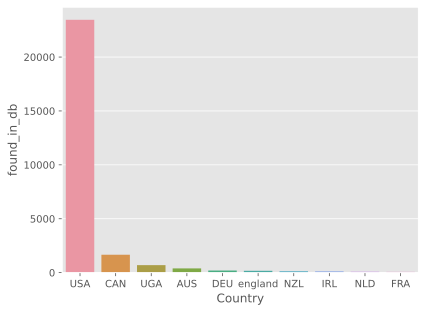

In [117]:

df_tmp=df_tt.iloc[:10,:]
sns.barplot(data=df_tmp,x=df_tmp.index, y='found_in_db');

## When finished saved processed data for further evaluation

In [55]:
# save to feather format
df.to_feather(FILE_FEATHER)

/home/keith/anaconda3/envs/p311/lib/python3.11/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
